In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load



import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')

df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

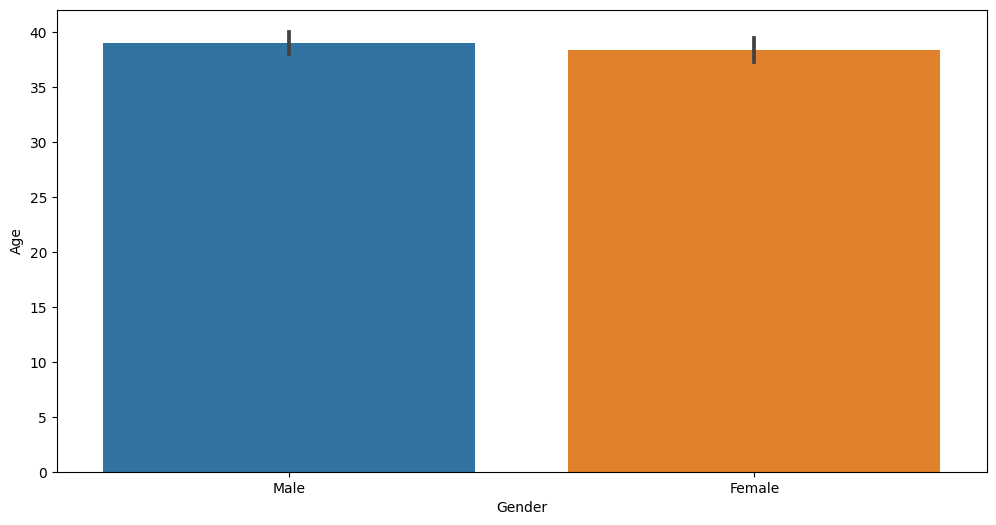

In [8]:
plt.figure(figsize=(12,6))

sns.barplot(x='Gender',y='Age',data=df)

plt.show()

## Gender Vs. Weight

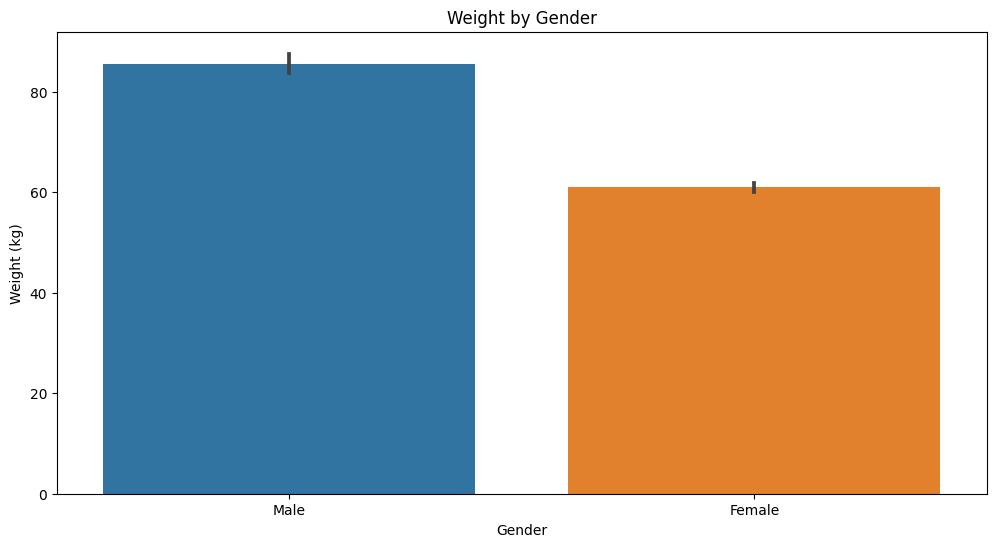

In [9]:
plt.figure(figsize=(12,6))

sns.barplot(x='Gender',y='Weight (kg)',data=df)

plt.title('Weight by Gender')

plt.show()

## Gender Vs. Height

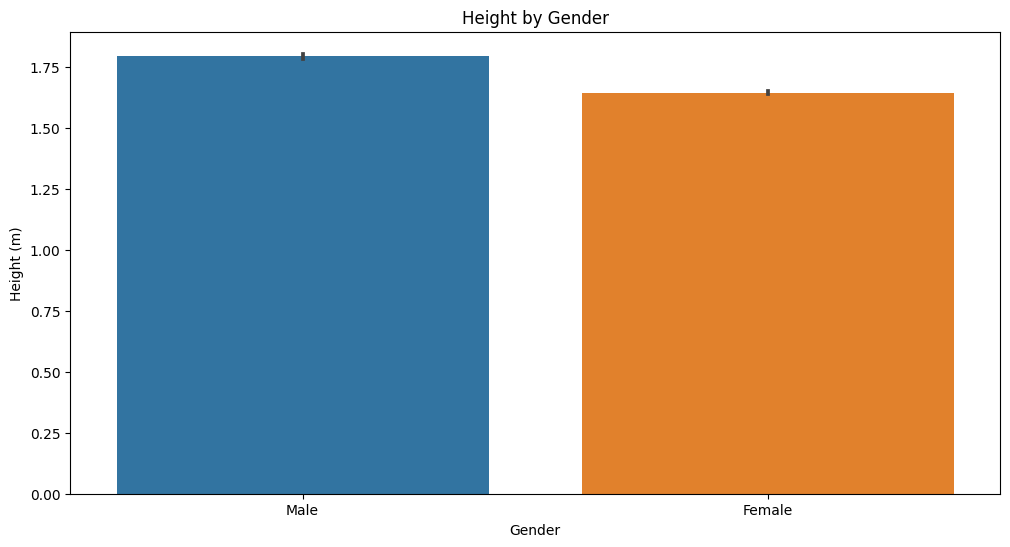

In [10]:
plt.figure(figsize=(12,6))

sns.barplot(x='Gender',y='Height (m)',data=df)

plt.title('Height by Gender')

plt.show()

## Gender Vs. Max BPM

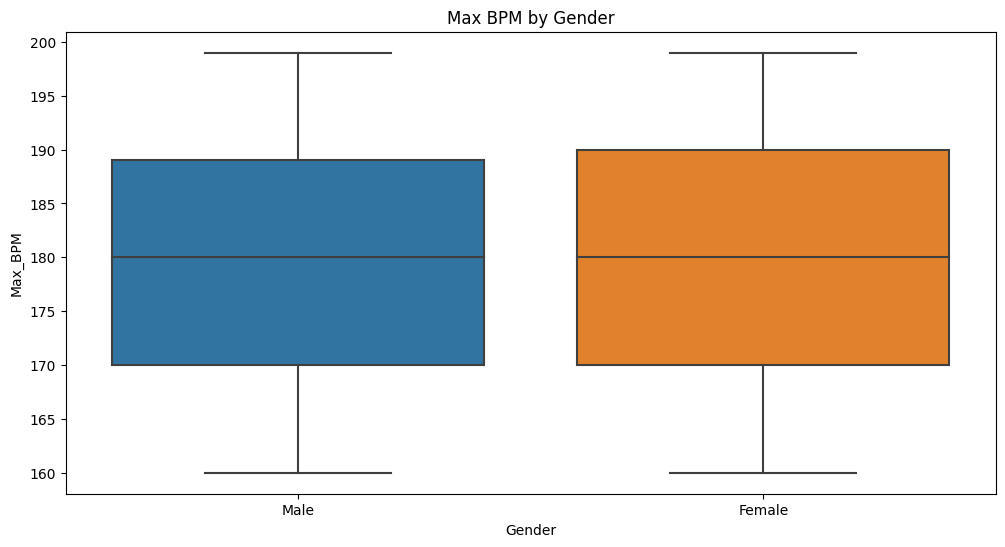

In [11]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Gender',y='Max_BPM',data=df)

plt.title('Max BPM by Gender')

plt.show()

## Gender Vs. Avg BMI

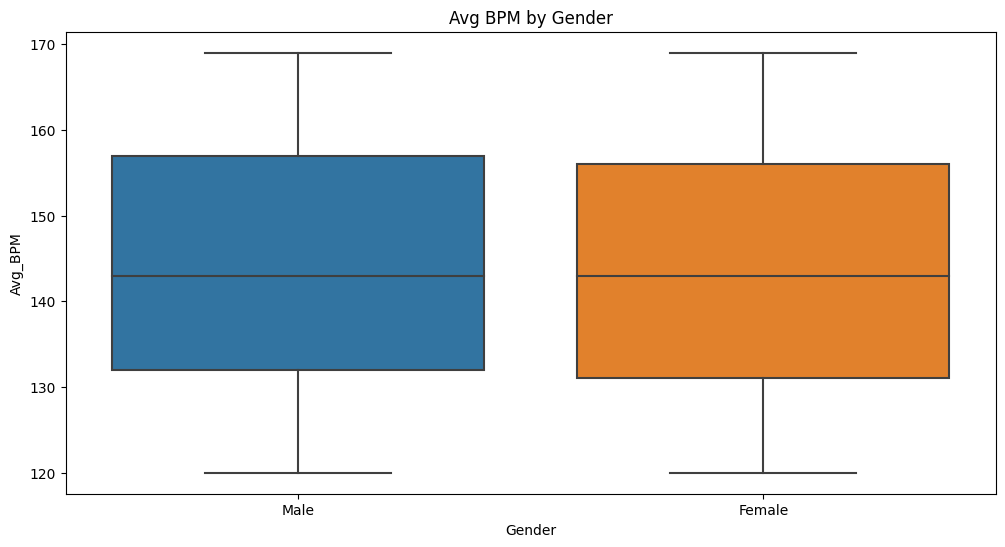

In [12]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Gender',y='Avg_BPM',data=df)

plt.title('Avg BPM by Gender')

plt.show()

## Gender Vs. Resting BPM

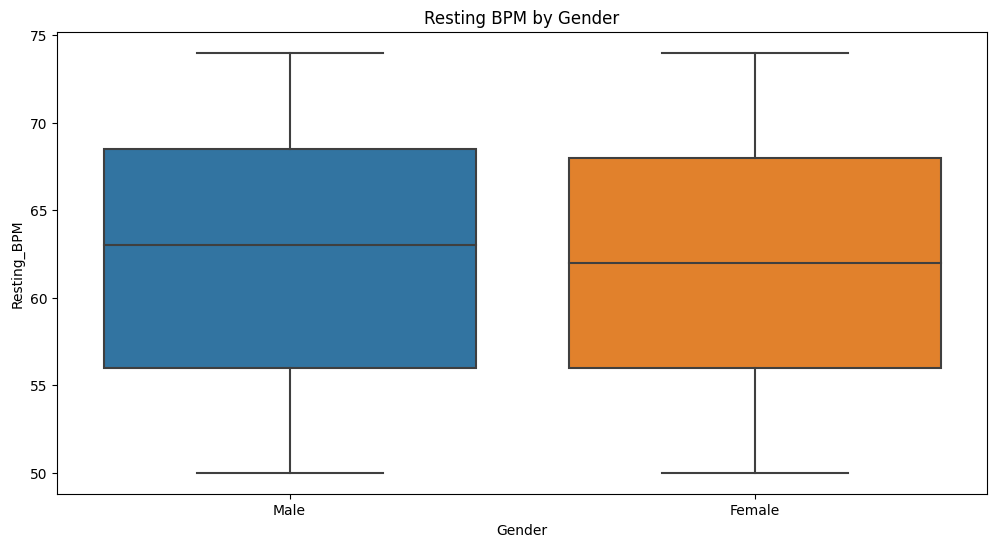

In [13]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Gender',y='Resting_BPM',data=df)

plt.title('Resting BPM by Gender')

plt.show()

## Gender Vs. Session Duration (hours)

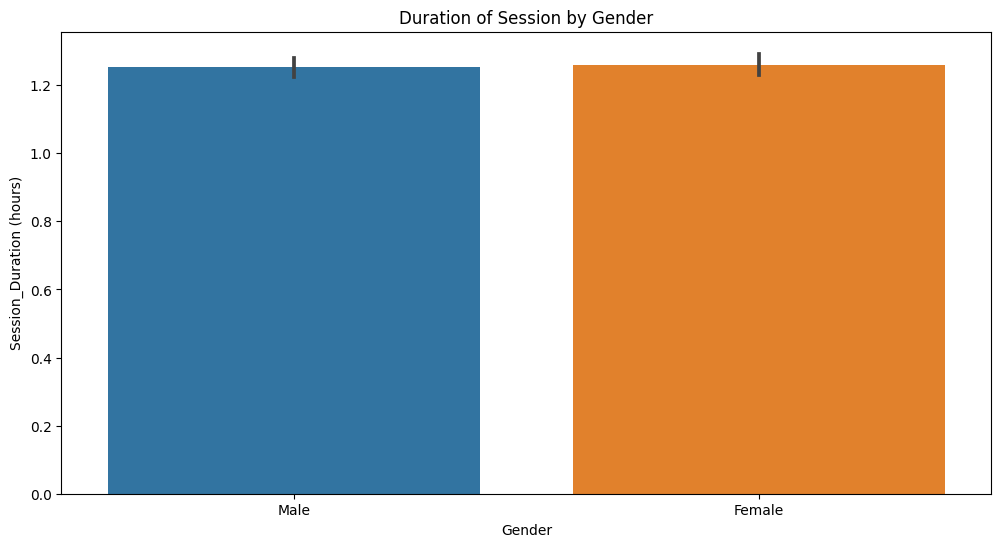

In [14]:
plt.figure(figsize=(12,6))

sns.barplot(x='Gender',y='Session_Duration (hours)',data=df)

plt.title('Duration of Session by Gender')

plt.show()

## Gender Vs. Calories Burned 

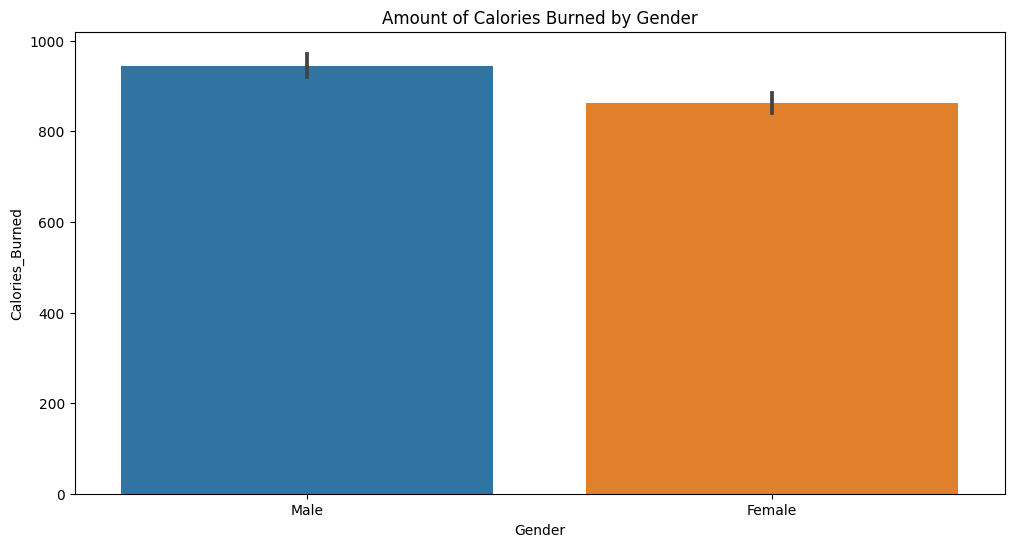

In [15]:
plt.figure(figsize=(12,6))

sns.barplot(x='Gender',y='Calories_Burned',data=df)

plt.title('Amount of Calories Burned by Gender')

plt.show()

## Workout Type Vs. Gender

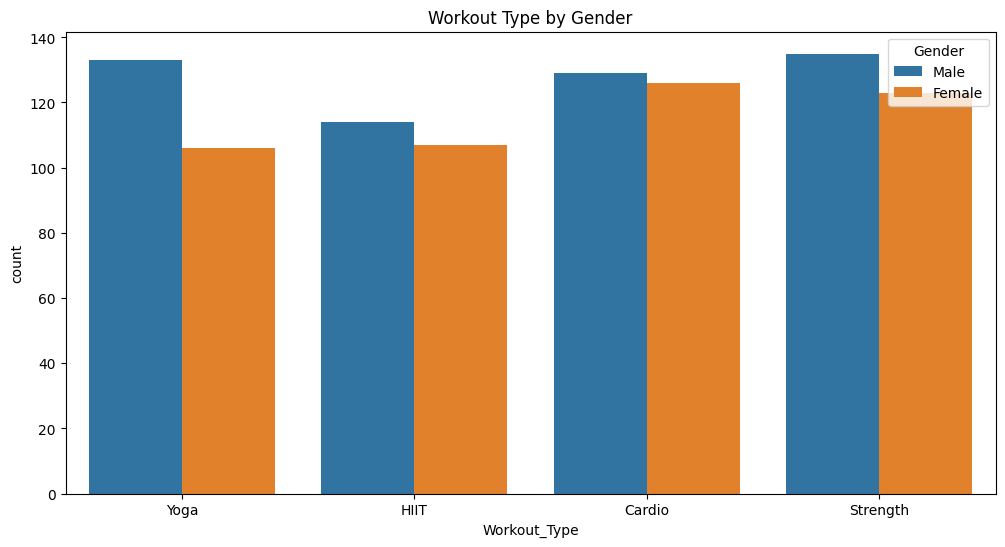

In [16]:
plt.figure(figsize=(12,6))

sns.countplot(hue='Gender',x='Workout_Type',data=df)

plt.title('Workout Type by Gender')

plt.show()

## Fat Percentage Vs. Gender

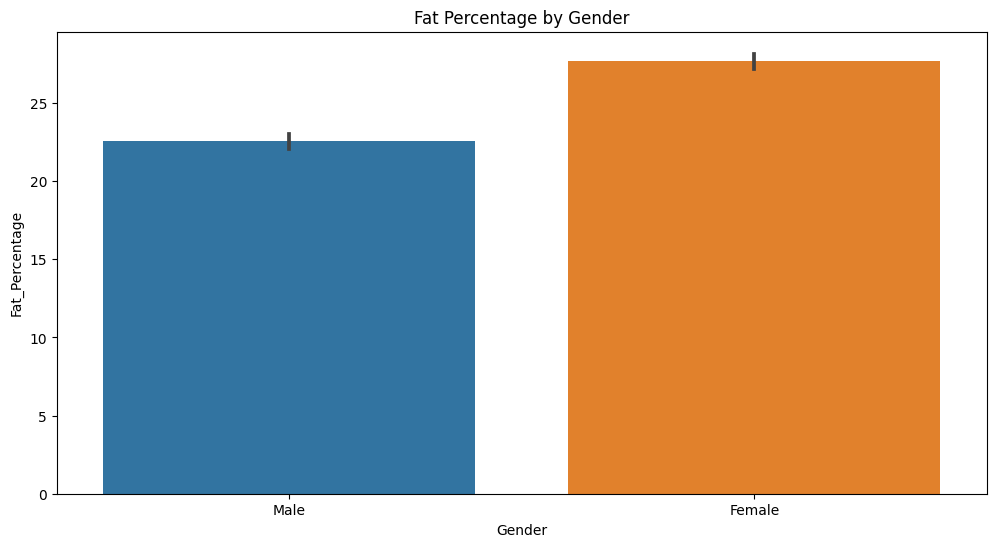

In [17]:
plt.figure(figsize=(12,6))

sns.barplot(x='Gender',y='Fat_Percentage',data=df)

plt.title('Fat Percentage by Gender')

plt.show()

## Gender Vs. Water Intake (liters)

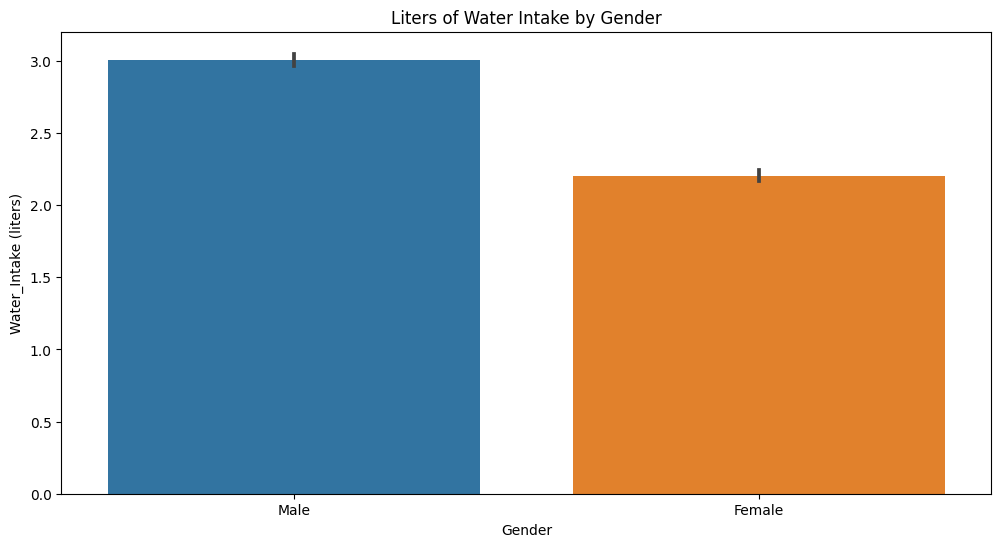

In [18]:
plt.figure(figsize=(12,6))

sns.barplot(x='Gender',y='Water_Intake (liters)',data=df)

plt.title('Liters of Water Intake by Gender')

plt.show()

## Gender Vs. Workout Frequency (days/week)

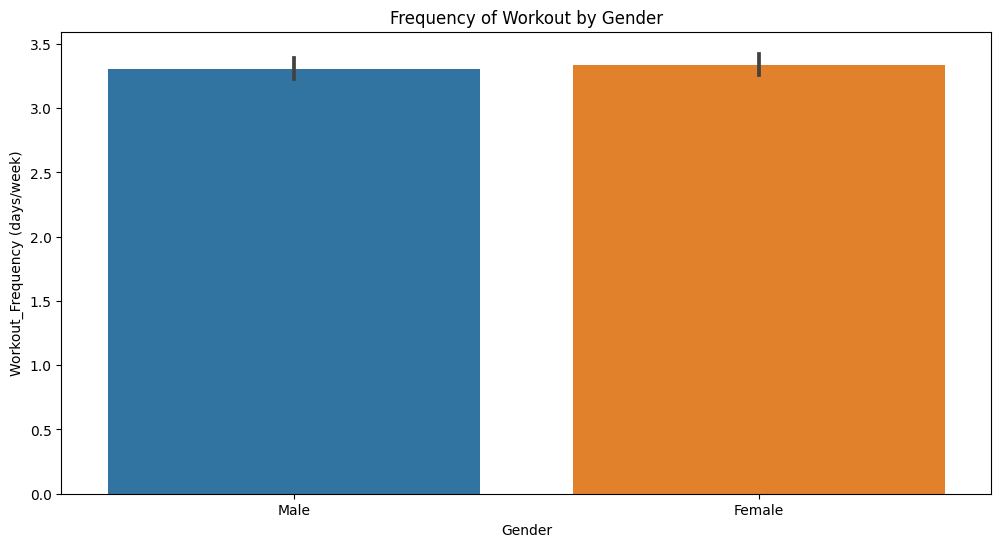

In [19]:
plt.figure(figsize=(12,6))

sns.barplot(x='Gender',y='Workout_Frequency (days/week)',data=df)

plt.title('Frequency of Workout by Gender')

plt.show()

## Gender Vs. Experience Level

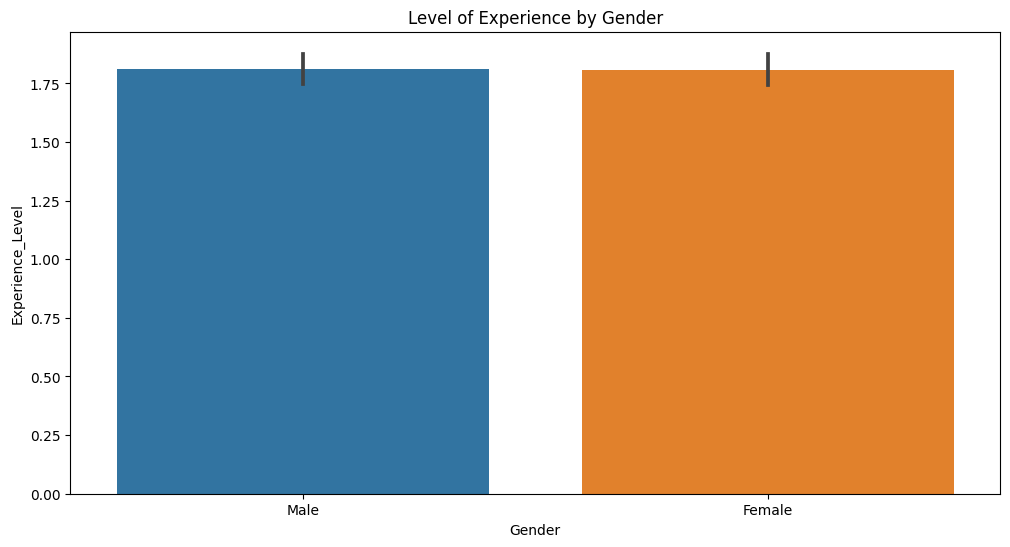

In [20]:
plt.figure(figsize=(12,6))

sns.barplot(x='Gender',y='Experience_Level',data=df)

plt.title('Level of Experience by Gender')

plt.show()

## Gender Vs. BMI

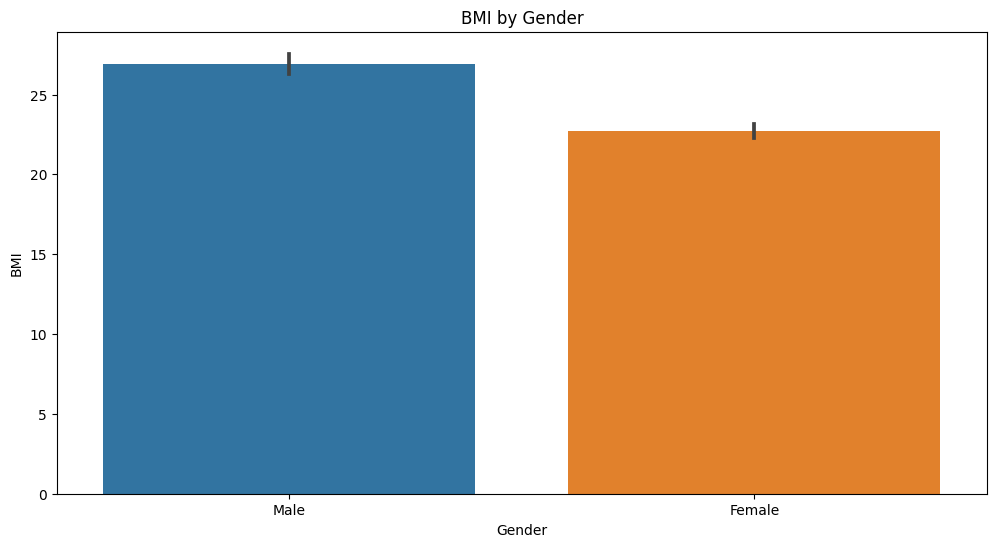

In [21]:
plt.figure(figsize=(12,6))

sns.barplot(x='Gender',y='BMI',data=df)

plt.title('BMI by Gender')

plt.show()

## BMI Vs. Weight

<Figure size 1200x600 with 0 Axes>

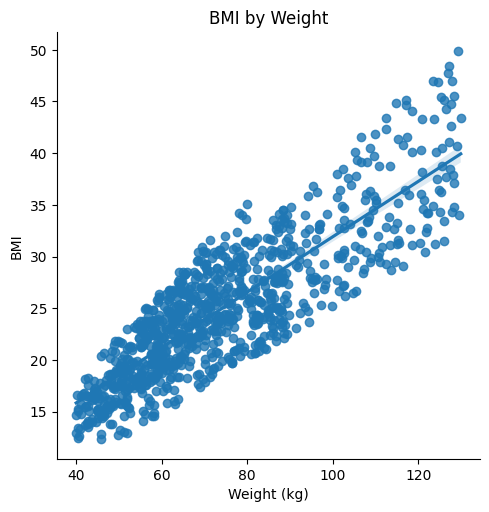

In [22]:
plt.figure(figsize=(12,6))

sns.lmplot(x='Weight (kg)',y='BMI',data=df)

plt.title('BMI by Weight')

plt.show()

## Workout Type Vs. Weight

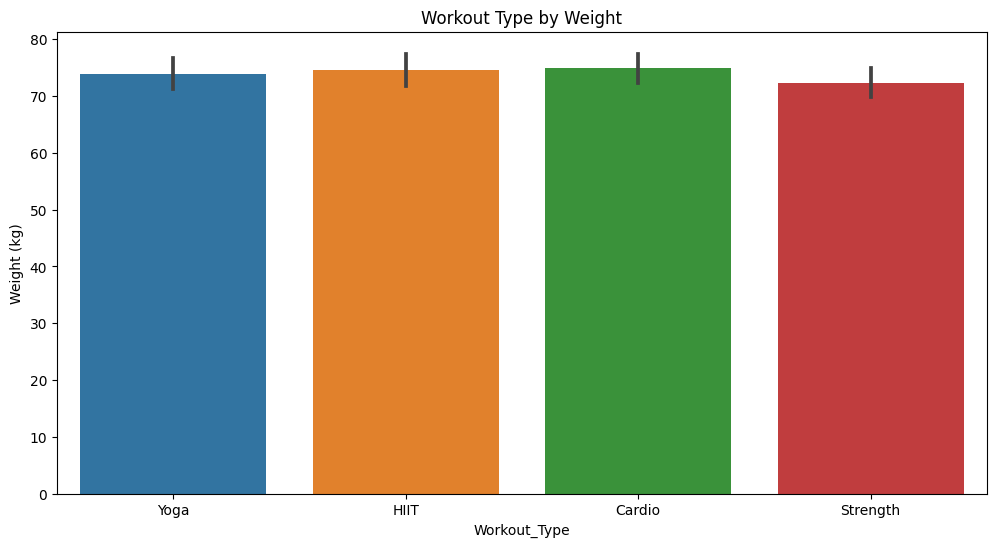

In [23]:
plt.figure(figsize=(12,6))

sns.barplot(y='Weight (kg)',x='Workout_Type',data=df)

plt.title('Workout Type by Weight')

plt.show()

## Workout Frequency Vs. Session Duration

<Figure size 1200x600 with 0 Axes>

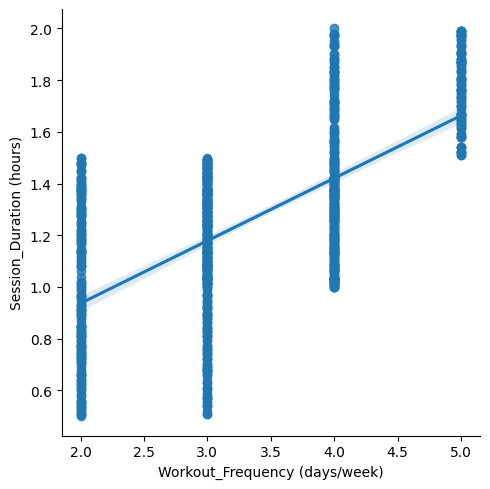

In [24]:
plt.figure(figsize=(12,6))

sns.lmplot(x='Workout_Frequency (days/week)',y='Session_Duration (hours)',data=df)

plt.show()

## Calories Burned Vs. Session Duration

<Figure size 1200x600 with 0 Axes>

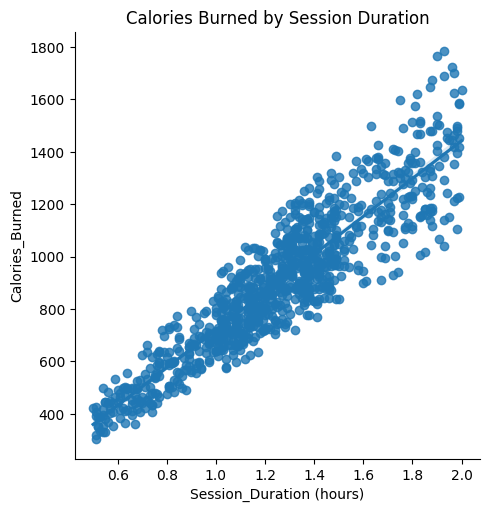

In [25]:
plt.figure(figsize=(12,6))

sns.lmplot(y='Calories_Burned',x='Session_Duration (hours)',data=df)

plt.title('Calories Burned by Session Duration')

plt.show()

## Calories Burned Vs. Workout Frequency

<Figure size 1200x600 with 0 Axes>

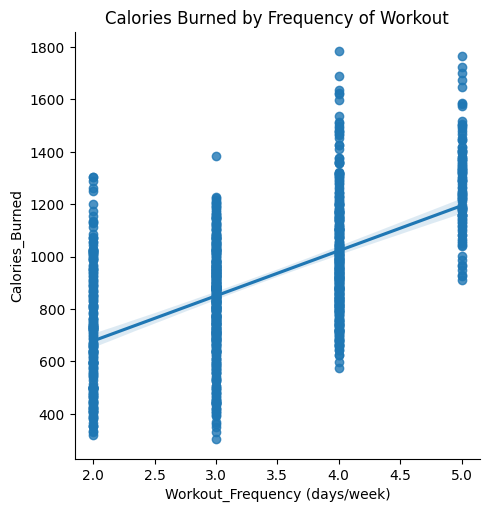

In [26]:
plt.figure(figsize=(12,6))

sns.lmplot(x='Workout_Frequency (days/week)',y='Calories_Burned',data=df)

plt.title('Calories Burned by Frequency of Workout')

plt.show()

In [27]:
numeric_df = df.select_dtypes(include='number')

## Handling Outliers

In [28]:
Q1 = df['Calories_Burned'].quantile(0.25)

Q3 = df['Calories_Burned'].quantile(0.75)

IQR = Q3-Q1



min = Q1 - 1.5* IQR

MAX = Q3 + 1.5* IQR



df['Calories_Burned'] = np.where(df['Calories_Burned'] < min, min, df['Calories_Burned'])

df['Calories_Burned'] = np.where(df['Calories_Burned'] > MAX, MAX, df['Calories_Burned'])

In [29]:
Q1 = df['BMI'].quantile(0.25)

Q3 = df['BMI'].quantile(0.75)

IQR = Q3-Q1



min = Q1 - 1.5* IQR

MAX = Q3 + 1.5* IQR



df['BMI'] = np.where(df['BMI'] < min, min, df['BMI'])

df['BMI'] = np.where(df['BMI'] > MAX, MAX, df['BMI'])

## Correlation

In [30]:
df['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [31]:
changes = {'Male': 0, 'Female':1}

In [32]:
df['Gender'] = df['Gender'].map(changes)

df['Gender'].head()

0    0
1    1
2    1
3    0
4    0
Name: Gender, dtype: int64

In [33]:
df['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [34]:
changes2 = {'Strength': 0, 'Cardio':1, 'Yoga':2, 'HIIT':3}

In [35]:
df['Workout_Type'] = df['Workout_Type'].map(changes2)

df['Workout_Type'].head()

0    2
1    3
2    1
3    0
4    0
Name: Workout_Type, dtype: int64

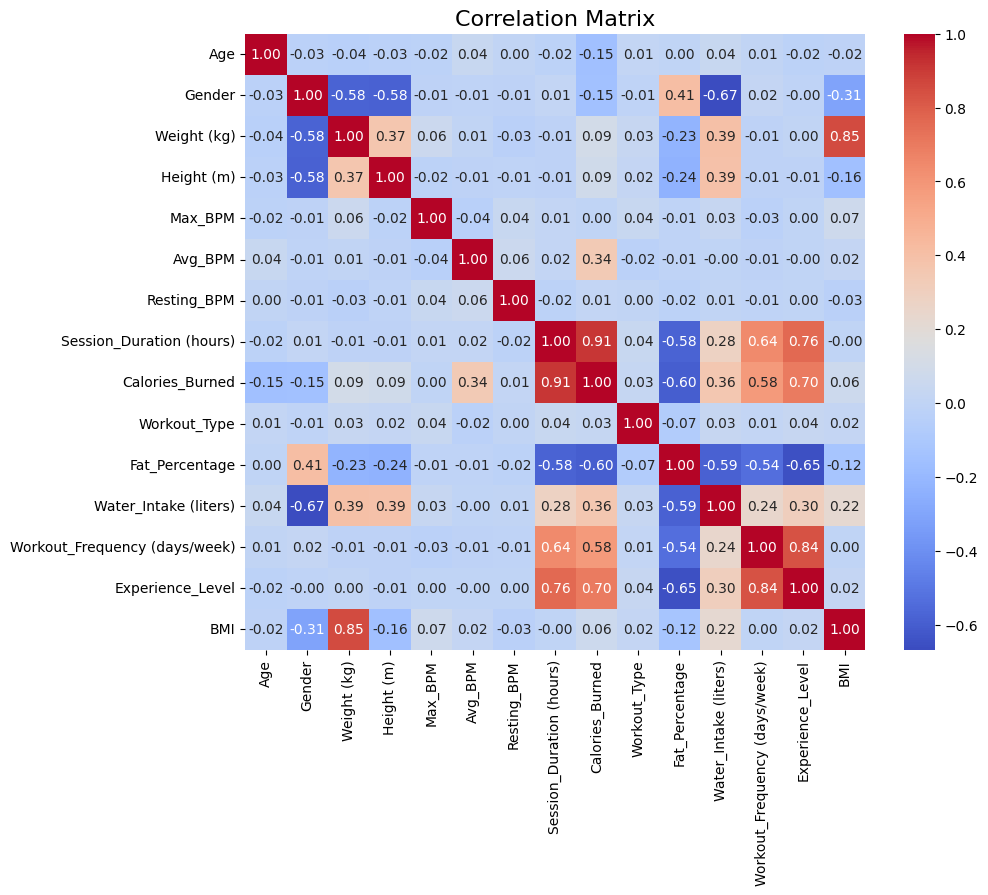

In [36]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix', fontsize=16)

plt.show()

# Models

In [37]:
threshold = 0.03

correlation = df.corr()

high_corr_features = correlation.index[abs(correlation['Calories_Burned']) > threshold].tolist()

high_corr_features.remove('Calories_Burned')

print('Selected features based on corrolation with target:')

print(high_corr_features)

X_selected = df[high_corr_features]

y = df['Calories_Burned']

Selected features based on corrolation with target:
['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Avg_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']


In [38]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X_selected)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, shuffle = True, random_state=42)

In [40]:
model = LogisticRegression() 

In [41]:
X_train.shape

(875, 11)

In [42]:
model.fit(X_train, Y_train)

LogisticRegression()

In [43]:
model.score(X_train, Y_train)

0.04342857142857143

In [44]:
y_pred = model.predict(X_test)

In [45]:
print(accuracy_score(y_pred, Y_test))

0.01020408163265306


In [46]:
param_grid = {

    'C':[0.1,1,10],

    'gamma':['scale',0.1,1,10],

    'kernel':['rbf']}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)

grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1, 10],
                         'kernel': ['rbf']},
             verbose=1)

In [47]:
grid_search.score(X_train, Y_train)

1.0

In [48]:
y_pred_grid = grid_search.predict(X_test)

In [49]:
print(accuracy_score(y_pred_grid, Y_test))

0.01020408163265306


In [5]:
# ===============================
# IMPORTS
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ===============================
# LOAD DATA
# ===============================
df = pd.read_csv('gym_members_exercise_tracking.csv')

# ===============================
# DATA CLEANING
# ===============================
# Handle outliers in Calories_Burned
Q1 = df['Calories_Burned'].quantile(0.25)
Q3 = df['Calories_Burned'].quantile(0.75)
IQR = Q3 - Q1
min_val = Q1 - 1.5 * IQR
max_val = Q3 + 1.5 * IQR
df['Calories_Burned'] = np.where(df['Calories_Burned'] < min_val, min_val, df['Calories_Burned'])
df['Calories_Burned'] = np.where(df['Calories_Burned'] > max_val, max_val, df['Calories_Burned'])

# Handle outliers in BMI
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
min_val = Q1 - 1.5 * IQR
max_val = Q3 + 1.5 * IQR
df['BMI'] = np.where(df['BMI'] < min_val, min_val, df['BMI'])
df['BMI'] = np.where(df['BMI'] > max_val, max_val, df['BMI'])

# Encode categorical columns
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Workout_Type'] = df['Workout_Type'].map({'Strength': 0, 'Cardio': 1, 'Yoga': 2, 'HIIT': 3})

# ===============================
# FEATURE SELECTION
# ===============================
correlation = df.corr()
threshold = 0.03
high_corr_features = correlation.index[abs(correlation['Calories_Burned']) > threshold].tolist()
high_corr_features.remove('Calories_Burned')

print("Selected Features:", high_corr_features)

X = df[high_corr_features]
y = df['Calories_Burned']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# TRAIN-TEST SPLIT
# ===============================
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y, test_size=0.1, shuffle=True, random_state=42
)

# ===============================
# MODEL TRAINING (Random Forest)
# ===============================
model = RandomForestRegressor(random_state=42, n_estimators=200)
model.fit(X_train, Y_train)

# ===============================
# EVALUATION
# ===============================
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(Y_test, y_pred))
print("R² Score:", r2_score(Y_test, y_pred))

# ===============================
# USER INPUT PREDICTION
# ===============================
user_data = {
    'Gender': 0,  # 0=Male, 1=Female
    'Age': 25,
    'Weight (kg)': 70,
    'Height (m)': 1.75,
    'Workout_Type': 1,  # 1 = Cardio
    'Workout_Frequency (days/week)': 4,
    'Session_Duration (hours)': 1.2,
    'BMI': 22,
    'Resting_BPM': 70,
    'Max_BPM': 160,
    'Avg_BPM': 120,
    'Fat_Percentage': 18,
    'Water_Intake (liters)': 2.5,
    'Experience_Level': 2
}

# Convert to dataframe
user_df = pd.DataFrame([user_data])

# Keep only selected features
user_scaled = scaler.transform(user_df[high_corr_features])

# Predict calories burned
predicted_calories = model.predict(user_scaled)[0]
print(f"\n🔥 Predicted Calories Burned: {predicted_calories:.2f}")

user_cases = [
    {
        'name': "Beginner Male (Cardio)",
        'Gender': 0,  # Male
        'Age': 25,
        'Weight (kg)': 70,
        'Height (m)': 1.75,
        'Workout_Type': 1,  # Cardio
        'Workout_Frequency (days/week)': 4,
        'Session_Duration (hours)': 1.0,
        'BMI': 22,
        'Resting_BPM': 70,
        'Max_BPM': 160,
        'Avg_BPM': 120,
        'Fat_Percentage': 18,
        'Water_Intake (liters)': 2.5,
        'Experience_Level': 2
    },
    {
        'name': "Female Intermediate (Strength)",
        'Gender': 1,  # Female
        'Age': 30,
        'Weight (kg)': 60,
        'Height (m)': 1.65,
        'Workout_Type': 0,  # Strength
        'Workout_Frequency (days/week)': 5,
        'Session_Duration (hours)': 1.5,
        'BMI': 23,
        'Resting_BPM': 68,
        'Max_BPM': 155,
        'Avg_BPM': 115,
        'Fat_Percentage': 22,
        'Water_Intake (liters)': 2.0,
        'Experience_Level': 3
    },
    {
        'name': "Male Advanced (HIIT)",
        'Gender': 0,  # Male
        'Age': 28,
        'Weight (kg)': 80,
        'Height (m)': 1.80,
        'Workout_Type': 3,  # HIIT
        'Workout_Frequency (days/week)': 6,
        'Session_Duration (hours)': 0.8,
        'BMI': 25,
        'Resting_BPM': 65,
        'Max_BPM': 180,
        'Avg_BPM': 140,
        'Fat_Percentage': 15,
        'Water_Intake (liters)': 3.0,
        'Experience_Level': 4
    }
]

# Run predictions for each case
for user in user_cases:
    user_df = pd.DataFrame([user])
    user_scaled = scaler.transform(user_df[high_corr_features])
    
    predicted_calories = model.predict(user_scaled)[0]
    weekly_calories = predicted_calories * user['Workout_Frequency (days/week)']
    monthly_calories = weekly_calories * 4  # approx 4 weeks
    
    print(f"\n===============================")
    print(f"👤 {user['name']}")
    print(f"🔥 Per Session: {predicted_calories:.2f} kcal")
    print(f"🌞 Per Day: {predicted_calories:.2f} kcal")
    print(f"📅 Per Week: {weekly_calories:.2f} kcal")
    print(f"🗓️ Per Month: {monthly_calories:.2f} kcal")


Selected Features: ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Avg_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']
MSE: 1910.0646028061221
R² Score: 0.977034379154776

🔥 Predicted Calories Burned: 776.18

👤 Beginner Male (Cardio)
🔥 Per Session: 680.75 kcal
🌞 Per Day: 680.75 kcal
📅 Per Week: 2723.02 kcal
🗓️ Per Month: 10892.08 kcal

👤 Female Intermediate (Strength)
🔥 Per Session: 945.03 kcal
🌞 Per Day: 945.03 kcal
📅 Per Week: 4725.18 kcal
🗓️ Per Month: 18900.70 kcal

👤 Male Advanced (HIIT)
🔥 Per Session: 603.54 kcal
🌞 Per Day: 603.54 kcal
📅 Per Week: 3621.27 kcal
🗓️ Per Month: 14485.08 kcal
